In [ ]:
# Libraries
%%capture
%pip install pydub
import gdown
from pydub import AudioSegment
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
from scipy.fft import rfft, rfftfreq

In [ ]:
gdown.download('https://drive.google.com/uc?id=1gh5HjLEZvdirsk0qpNtxxUdTJmUsNo25', None, quiet=False)
gdown.download('https://drive.google.com/uc?id=14zdPpulJUqtSb2O77nZ_31BLdBTe4xJ0', None, quiet=False)
gdown.download('https://drive.google.com/uc?id=1xOlv8hb5NlB2V1VjJfPGEIbiGTxa-ic6', None, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1gh5HjLEZvdirsk0qpNtxxUdTJmUsNo25
To: /content/blues.au
100%|██████████| 1.32M/1.32M [00:00<00:00, 142MB/s]
Downloading...
From: https://drive.google.com/uc?id=14zdPpulJUqtSb2O77nZ_31BLdBTe4xJ0
To: /content/manager.mp3
100%|██████████| 151k/151k [00:00<00:00, 60.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xOlv8hb5NlB2V1VjJfPGEIbiGTxa-ic6
To: /content/zvuki-goroda.mp3
100%|██████████| 2.14M/2.14M [00:00<00:00, 79.1MB/s]


'zvuki-goroda.mp3'

Задача 1

При помощи библиотеки pydub откройте файл blues.au и воспроизведите только последние 10 секунд аудиозаписи.

In [ ]:
# Открываем файл blues.au и сразу оставляем последние 10 секунд
sound = AudioSegment.from_file("blues.au")[-10000:]
sound

Задача 2

При помощи библиотеки pydub откройте файл blues.au и увеличьте громкость на 10 dB.

In [ ]:
# Открываем файл blues.au
sound2 = AudioSegment.from_file("blues.au")
sound2

In [ ]:
# Прибавляем громкость
louder_sound = sound2 + 10
louder_sound

Задача 3

При помощи библиотеки pydub откройте файл blues.au, выполните реверс аудиофайла и объедините с исходным файлом последовательно.

In [ ]:
# Открываем файл blues.au
sound3 = AudioSegment.from_file("blues.au")

# Выполняем реверс аудиофайла
reversed_sound = sound3.reverse()

# Объединяем исходный и реверсированный файлы последовательно
combined_sound = sound3 + reversed_sound
combined_sound

Задача 4

При помощи библиотеки librosa откройте файл blues.au и выведите на экран последние 10 секунд временного ряда аудио.

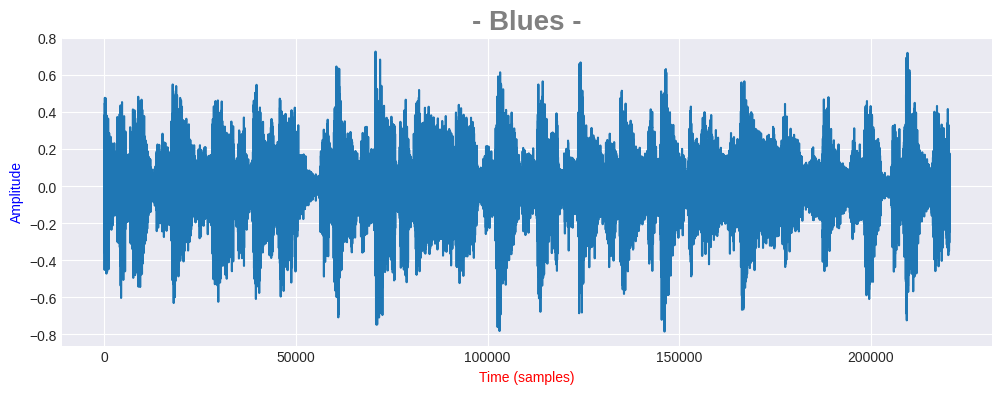

In [ ]:
# Открываем файл blues.au и получаем временной ряд и частоту дискретизации
y, sr = librosa.load("blues.au")

# Получаем длительность аудиозаписи в секундах
duration = librosa.get_duration(y=y, sr=sr)

# Вырезаем последние 10 секунд аудиозаписи
last_10_seconds = y[-sr*10:]

# Задаём размер и стиль
plt.figure(figsize=(12,4))
plt.style.use("seaborn-v0_8-darkgrid")

# Строим график временного ряда
plt.plot(last_10_seconds)
plt.title("- Blues -", fontsize=20, fontweight="bold", c='gray')
plt.xlabel("Time (samples)", c='r')
plt.ylabel("Amplitude", c='b')
plt.show()

Задача 5

При помощи библиотеки librosa откройте файл blues.au и выведите на экран последние 10 секунд аудио в виде спектрограммы.


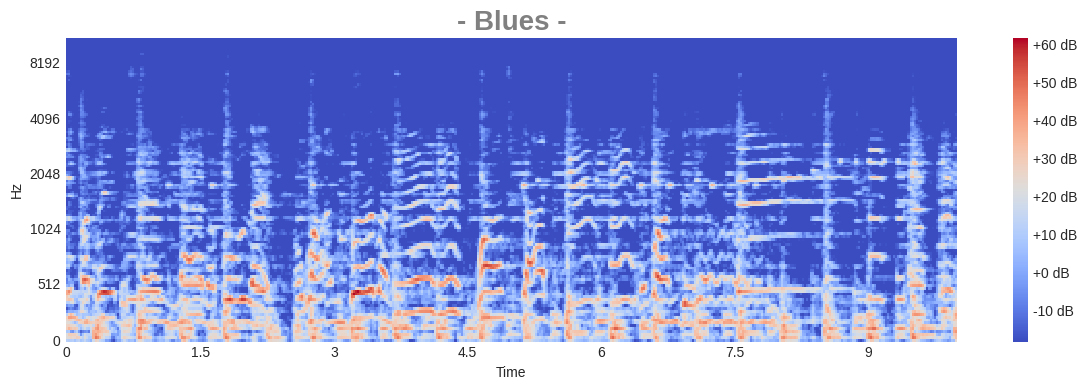

In [ ]:
# Загрузить файл blues.au как временной ряд с частотой дискретизации 22050 Гц
y, sr = librosa.load('blues.au')

# Вычислить длину аудио в секундах
duration = len(y) / sr

# Выбрать последние 10 секунд аудио
y_last_10 = y[-sr*10:]

# Вычислить спектрограмму мощности
S = librosa.feature.melspectrogram(y=y_last_10, sr=sr)

# Преобразовать спектрограмму в децибелы
S_dB = librosa.amplitude_to_db(S)

# Нарисовать спектрограмму
plt.figure(figsize=(12, 4))
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title("- Blues -", fontsize=20, fontweight="bold", c='gray')
plt.tight_layout()
plt.show()